In [1]:
import pandas as pd 

df = pd.read_csv('../data/MachineLearningRating_v3.txt',  delimiter='|')

C:\Users\tsega\AppData\Local\Temp\ipykernel_15496\3358586165.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt',  delimiter='|')


In [2]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [3]:
missing_summary = df.isnull().sum()
print("Missing Values Summary:\n", missing_summary[missing_summary > 0])


Missing Values Summary:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [4]:
# Drop rows with critical vehicle info missing (if needed for vehicle analysis)
df = df.dropna(subset=['make', 'Model', 'VehicleType'])

# Fill categorical fields with 'Unknown'
categorical_to_fill = ['Gender', 'MaritalStatus', 'AccountType', 'Bank']
df[categorical_to_fill] = df[categorical_to_fill].fillna('Unknown')

# Drop columns with too many nulls
columns_to_drop = [
    'CustomValueEstimate', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted',
    'CrossBorder', 'NumberOfVehiclesInFleet'
]
df.drop(columns=columns_to_drop, inplace=True)

# Drop a couple of rows with capital outstanding missing
df = df.dropna(subset=['CapitalOutstanding'])

In [5]:
cleaned_data = df.isnull().sum()
print(f'after cleaning missing data ${cleaned_data > 0} ')

after cleaning missing data $UnderwrittenCoverID         False
PolicyID                    False
TransactionMonth            False
IsVATRegistered             False
Citizenship                 False
LegalType                   False
Title                       False
Language                    False
Bank                        False
AccountType                 False
MaritalStatus               False
Gender                      False
Country                     False
Province                    False
PostalCode                  False
MainCrestaZone              False
SubCrestaZone               False
ItemType                    False
mmcode                      False
VehicleType                 False
RegistrationYear            False
make                        False
Model                       False
Cylinders                   False
cubiccapacity               False
kilowatts                   False
bodytype                    False
NumberOfDoors               False
VehicleIntroDate   

In [6]:
import os
import sys
sys.path.append('../scripts')
from project_planning import convert_categoricals 
convert_categoricals(df)


Converted 27 columns to 'category':
['make', 'CoverCategory', 'LegalType', 'Title', 'AlarmImmobiliser', 'Citizenship', 'CoverGroup', 'Product', 'Province', 'AccountType', 'bodytype', 'TrackingDevice', 'CoverType', 'Section', 'ExcessSelected', 'StatutoryRiskType', 'TermFrequency', 'Language', 'MaritalStatus', 'Country', 'Gender', 'SubCrestaZone', 'StatutoryClass', 'MainCrestaZone', 'ItemType', 'VehicleType', 'Bank']


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [7]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [8]:
import os
import sys
sys.path.append('../scripts')

In [21]:
import importlib
import os
import sys
sys.path.append('../scripts')
import project_planning
importlib.reload(project_planning)

from project_planning import (
    plot_univariate_distributions,
    plot_correlation_analysis,
    plot_geographic_trends,
    plot_outliers,
    plot_temporal_trends,
    plot_make_vs_claims,
    summarize_statistics
)

In [22]:
numerical_cols = ["TotalPremium", "TotalClaims"]
summarize_statistics(df, numerical_cols)

,count,mean,std,min,25%,50%,75%,max,variance
TotalPremium,999544.0,61.372350,157.014098,-782.576754,0.0,2.179737,21.929825,2253.507281,2.465343e+04
TotalClaims,999544.0,64.340199,2369.567085,-12002.412281,0.0,0.000000,0.000000,393092.105263,5.614848e+06


Converted 14 columns to 'category':
['CoverGroup', 'Language', 'CoverType', 'LegalType', 'MaritalStatus', 'Country', 'Title', 'Gender', 'StatutoryClass', 'Province', 'VehicleType', 'ItemType', 'StatutoryRiskType', 'Citizenship']


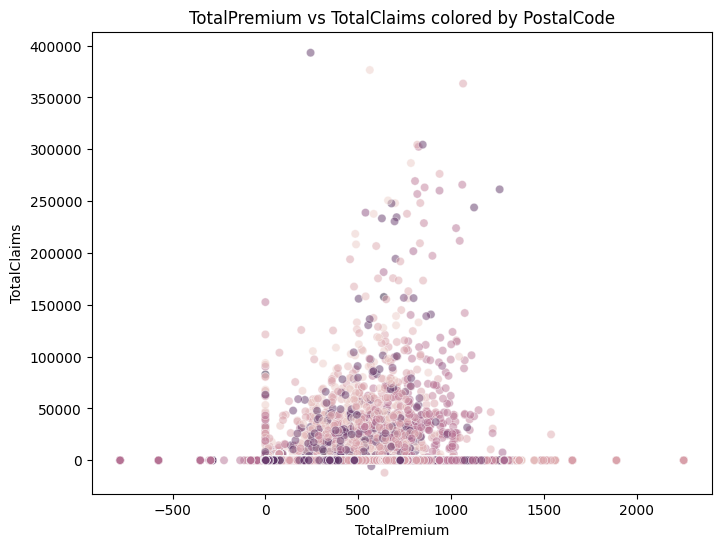

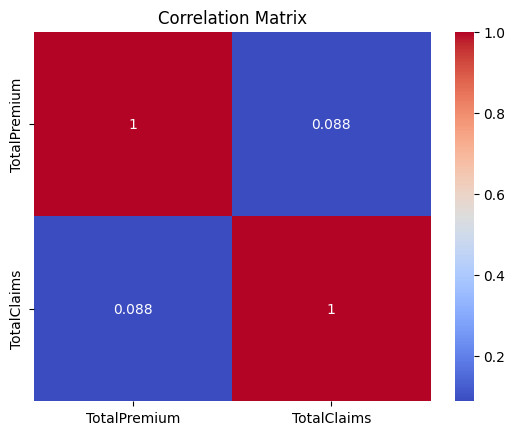

c:\Users\tsega\Desktop\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\notebooks\../scripts\project_planning.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_stats = df.groupby("Province")[metric].mean().sort_values()
c:\Users\tsega\Desktop\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\notebooks\../scripts\project_planning.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_stats.values, y=province_stats.index, palette="viridis")


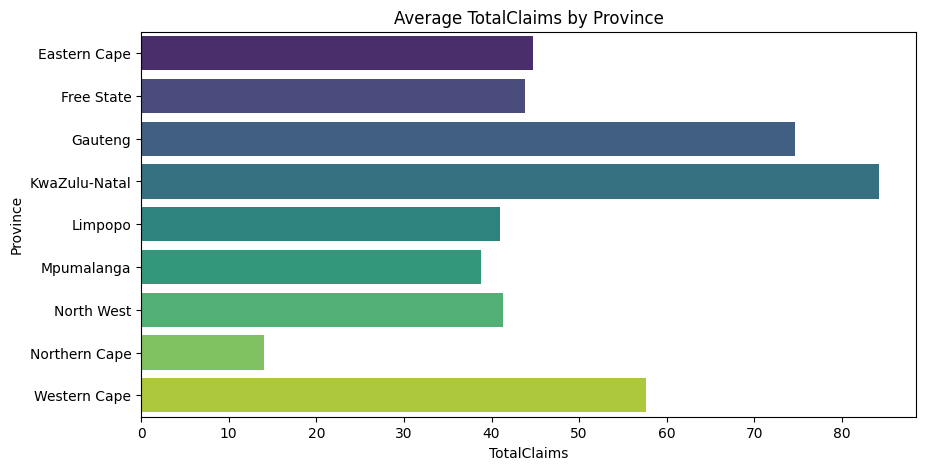

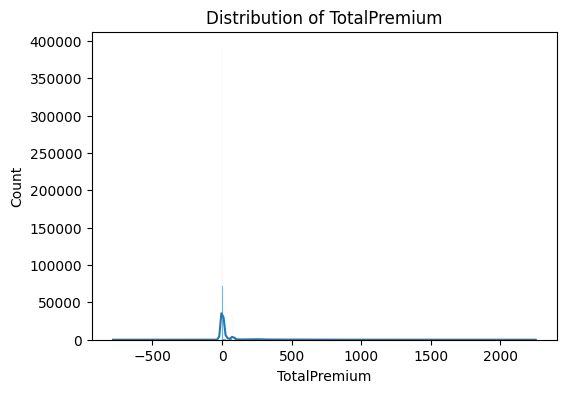

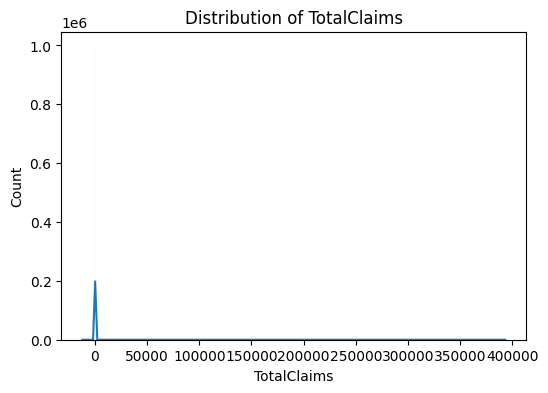

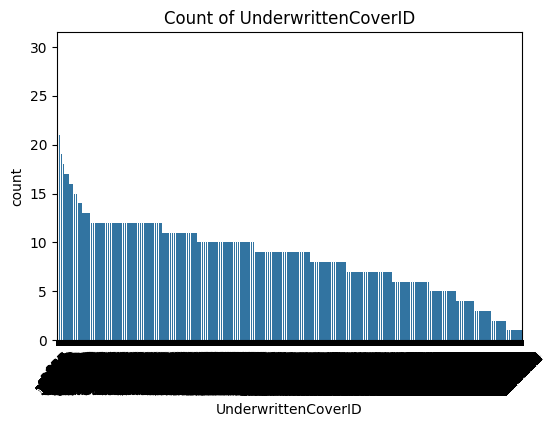

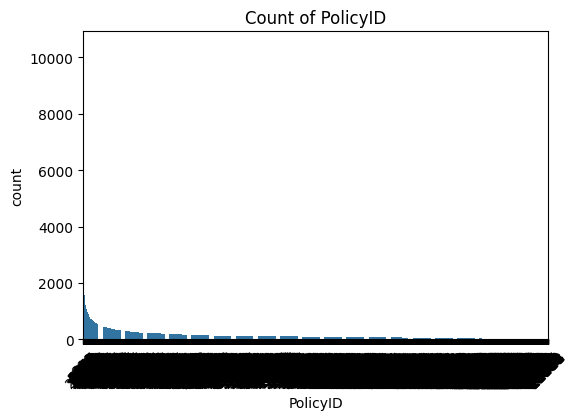

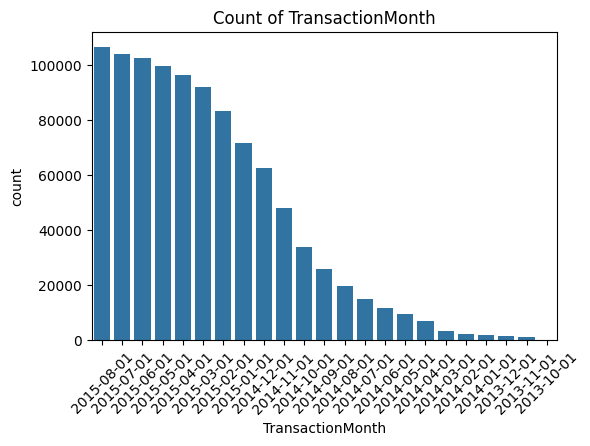

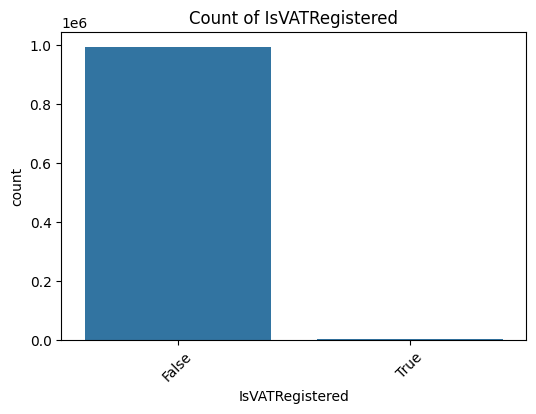

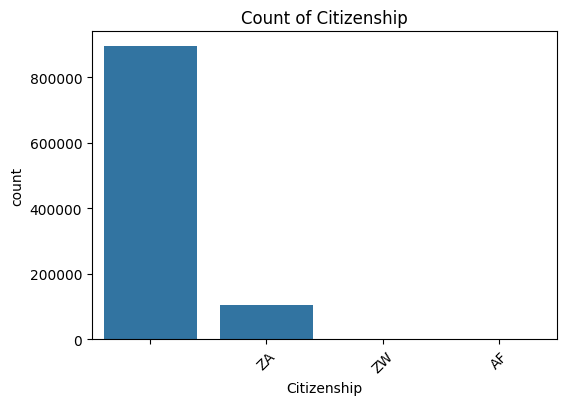

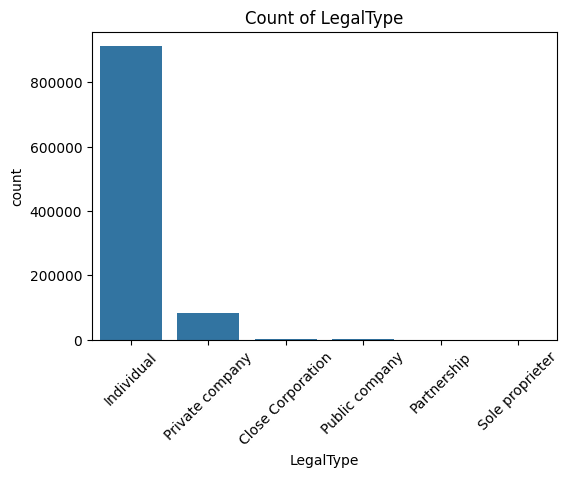

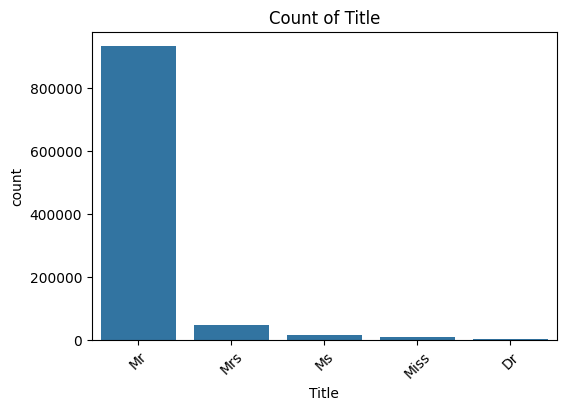

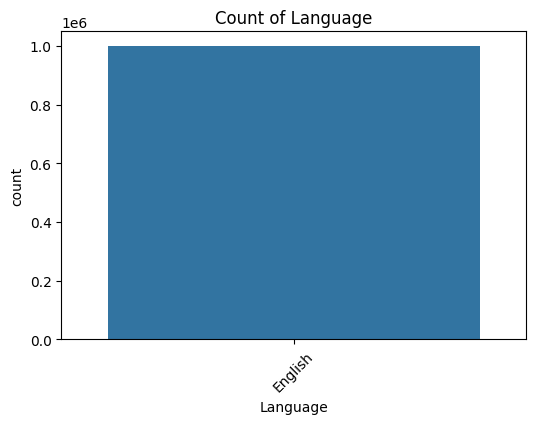

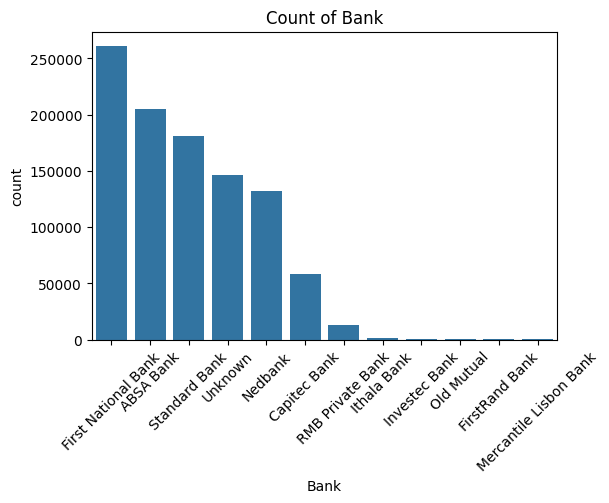

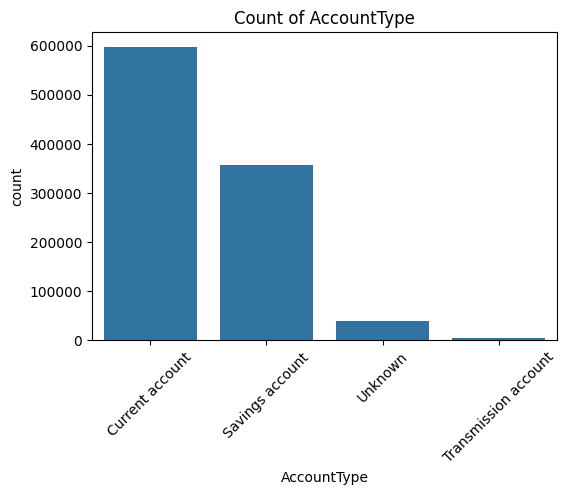

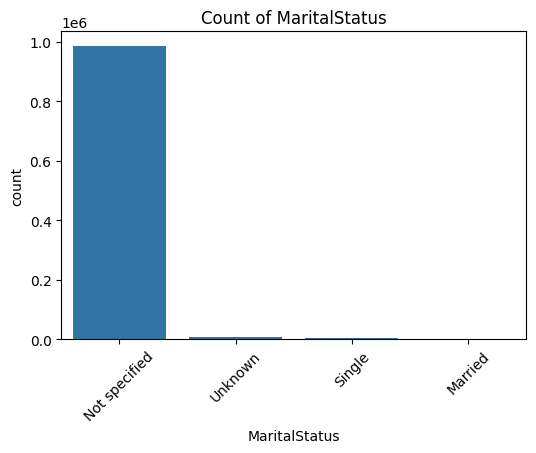

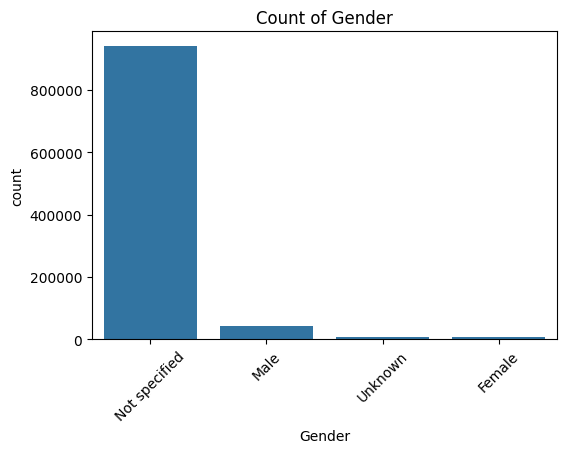

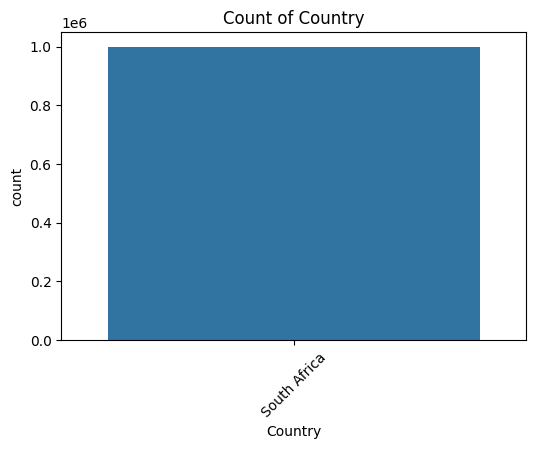

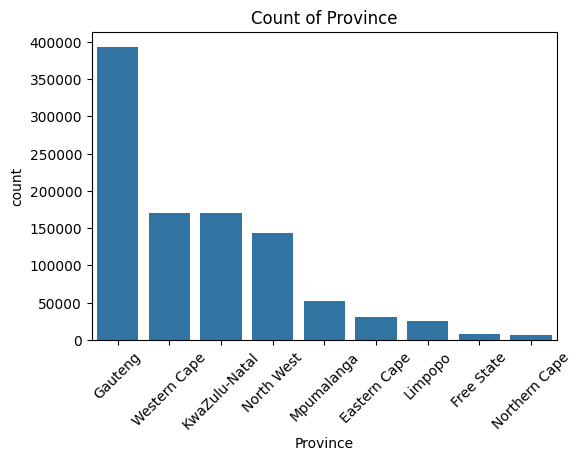

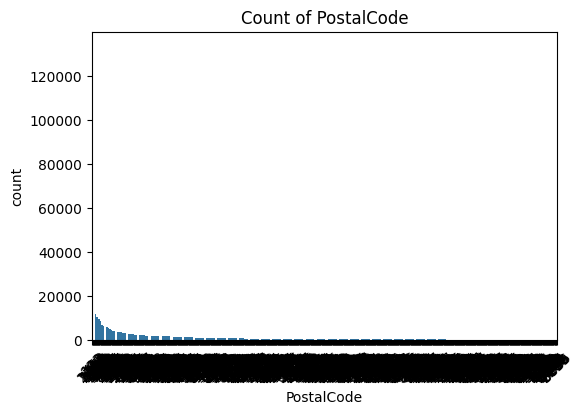

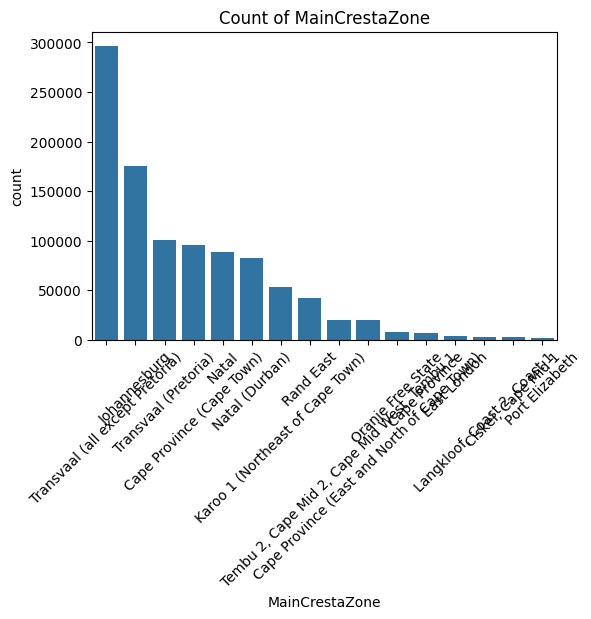

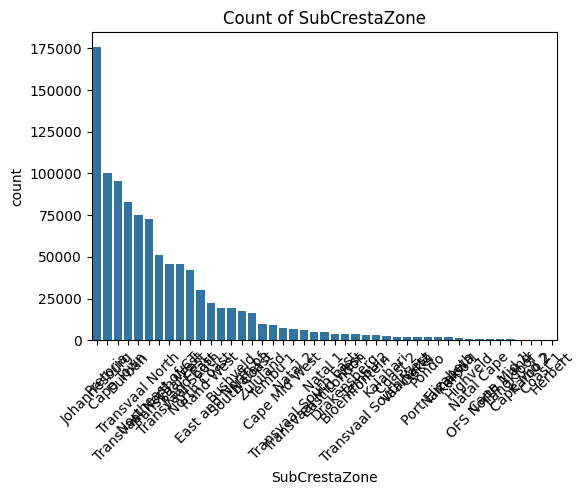

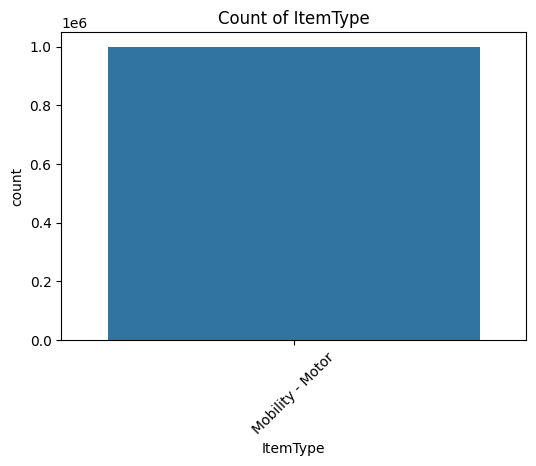

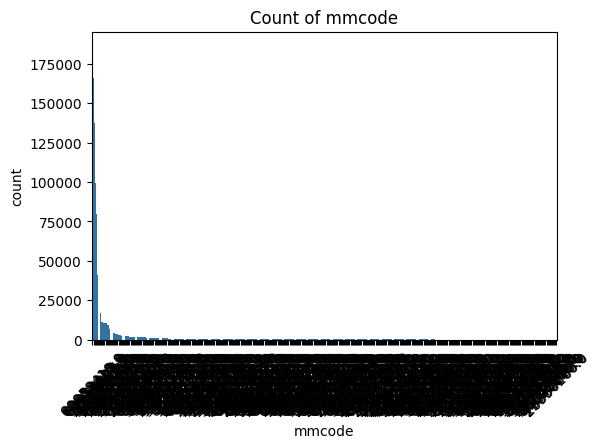

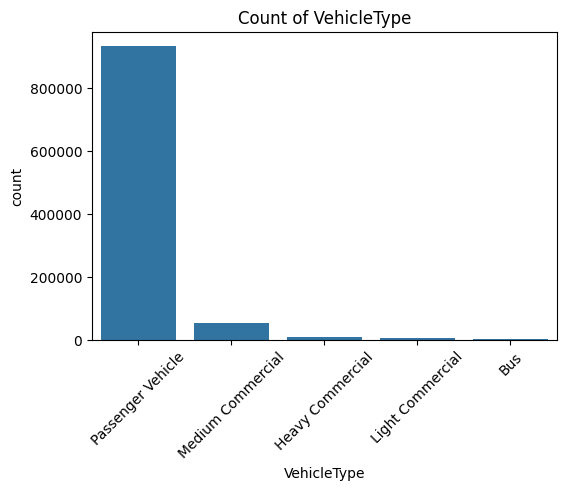

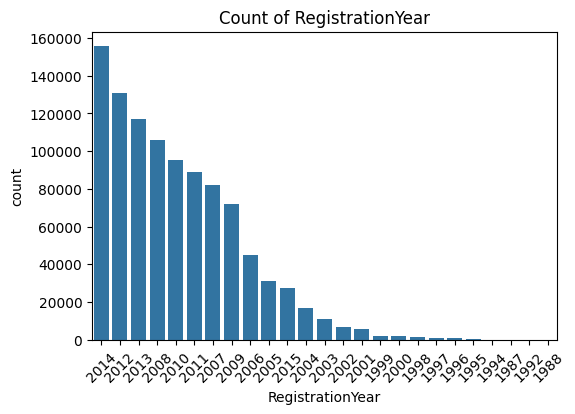

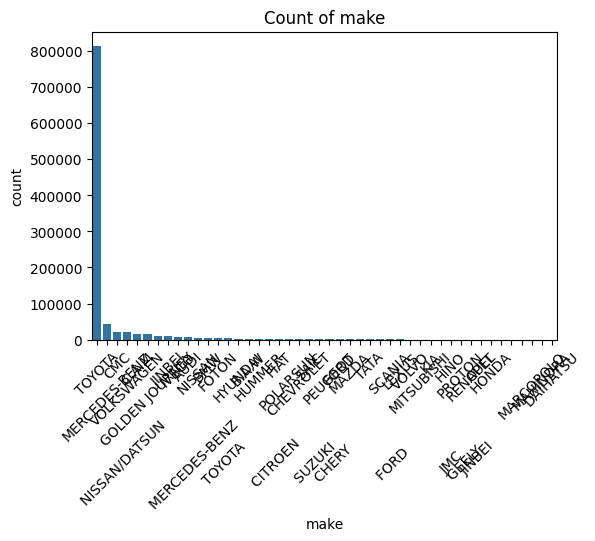

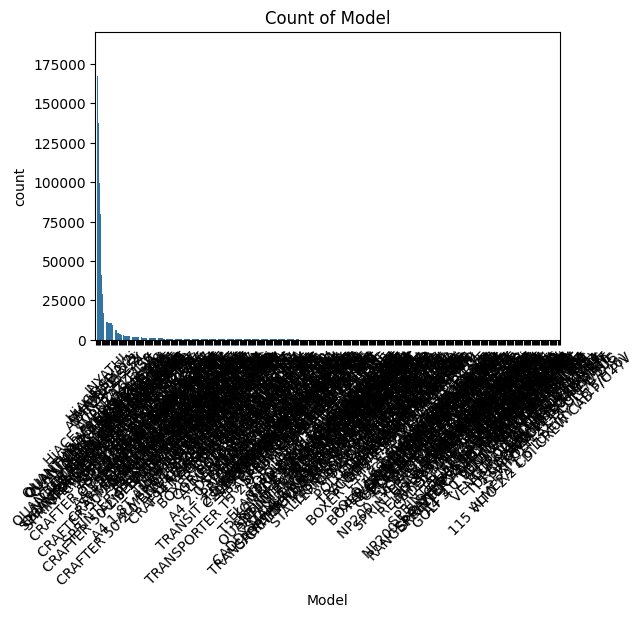

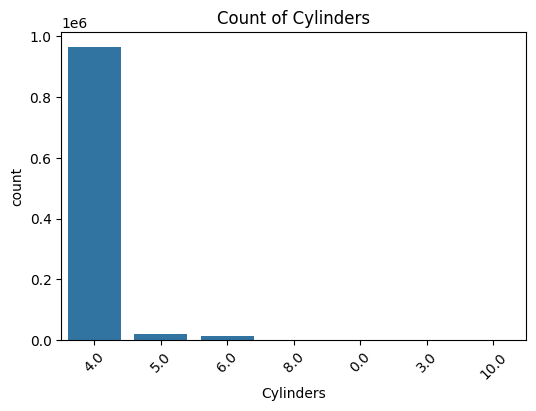

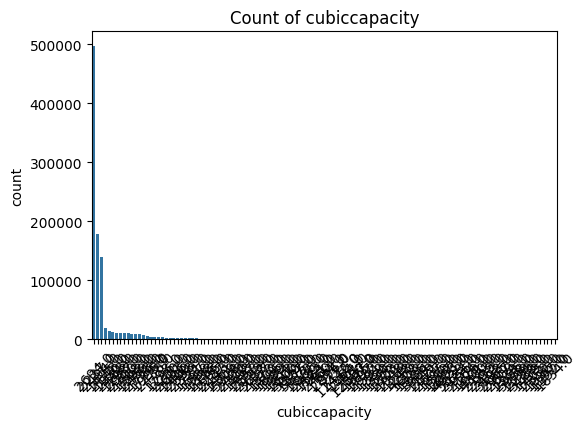

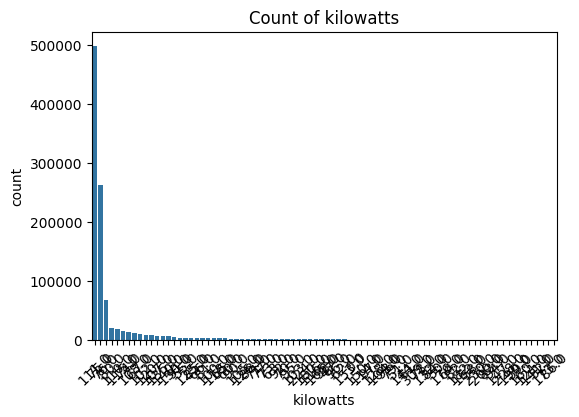

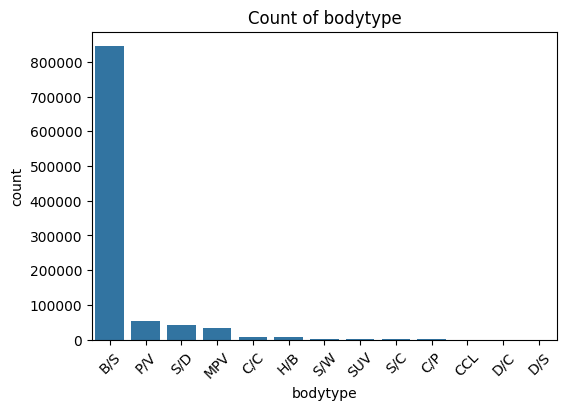

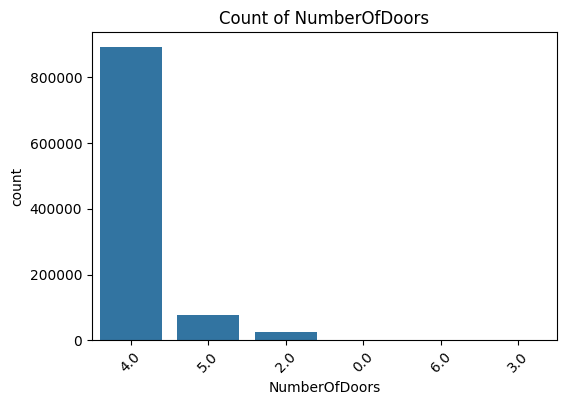

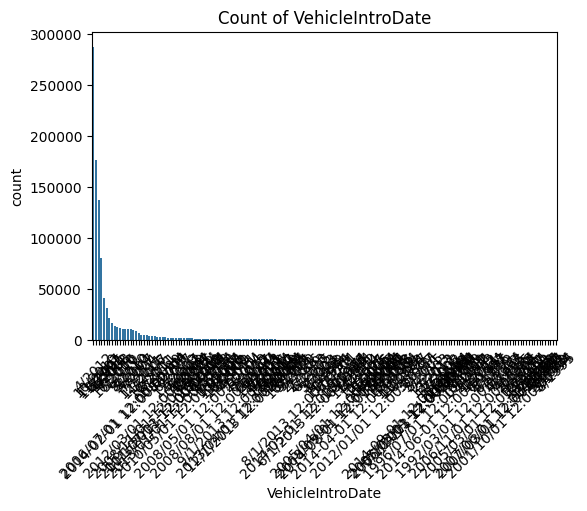

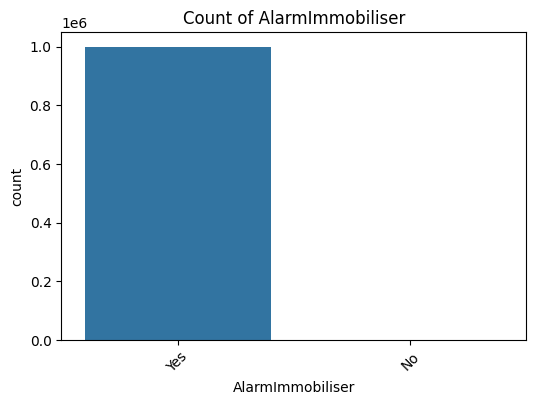

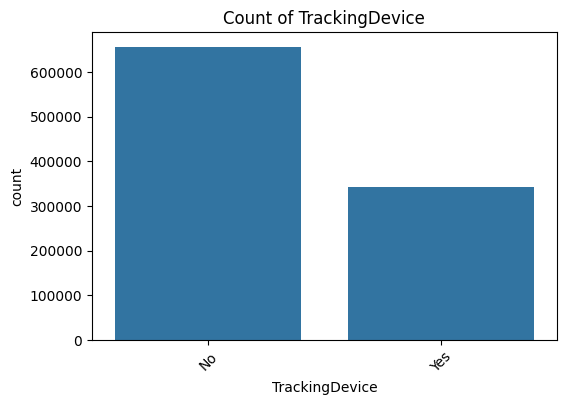

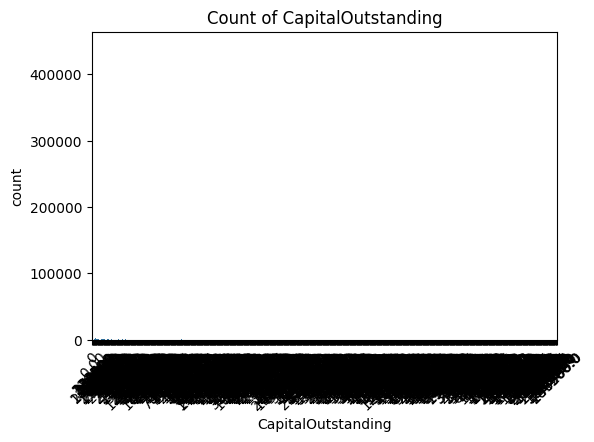

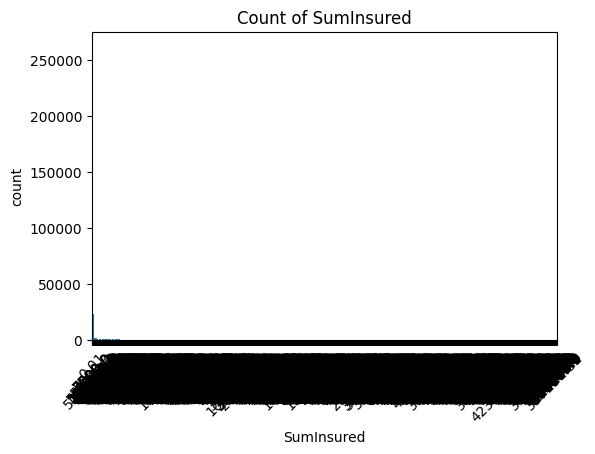

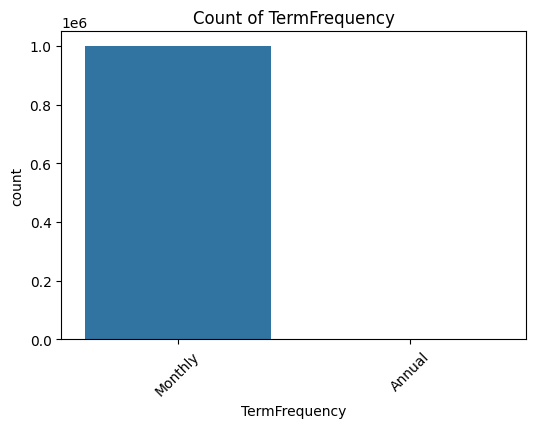

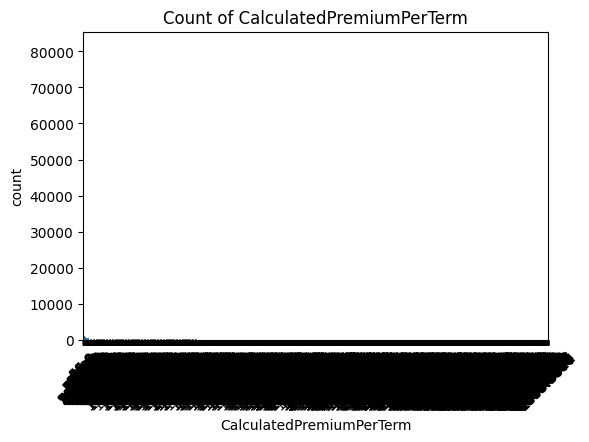

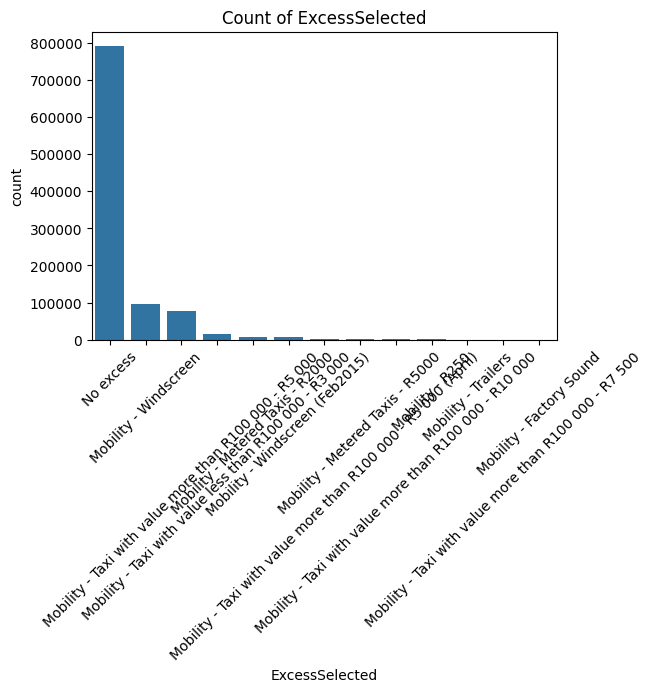

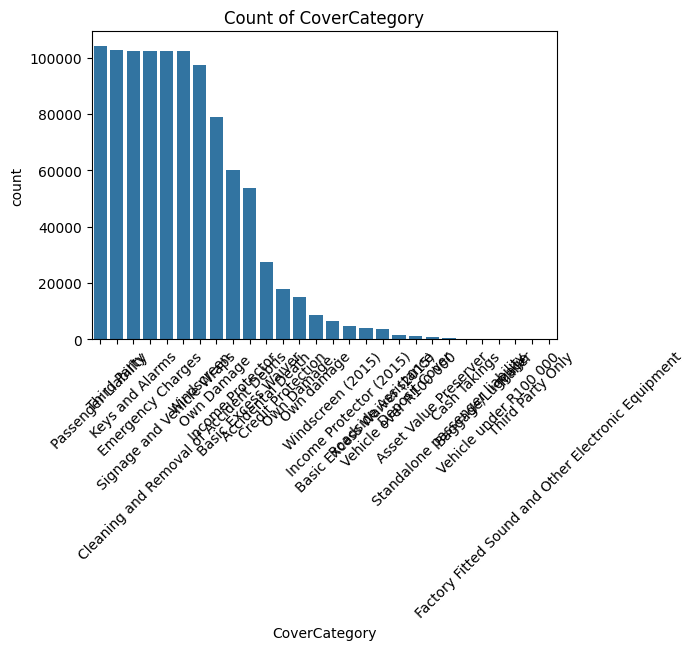

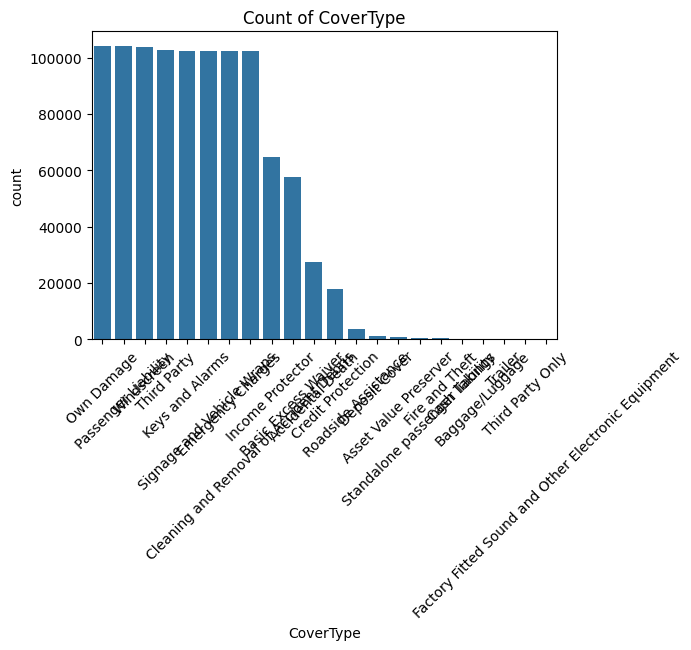

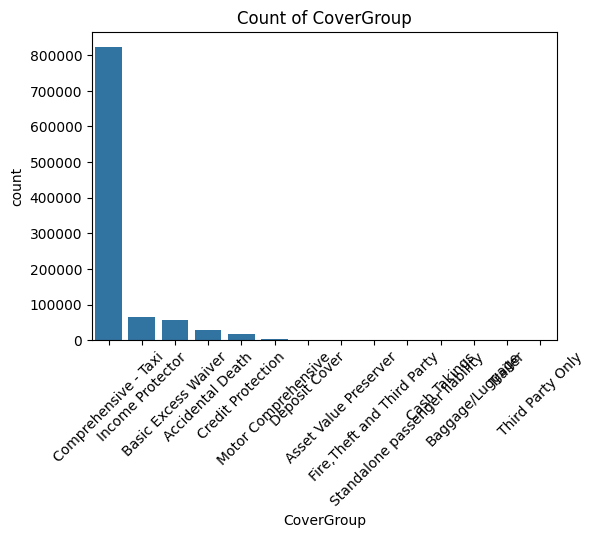

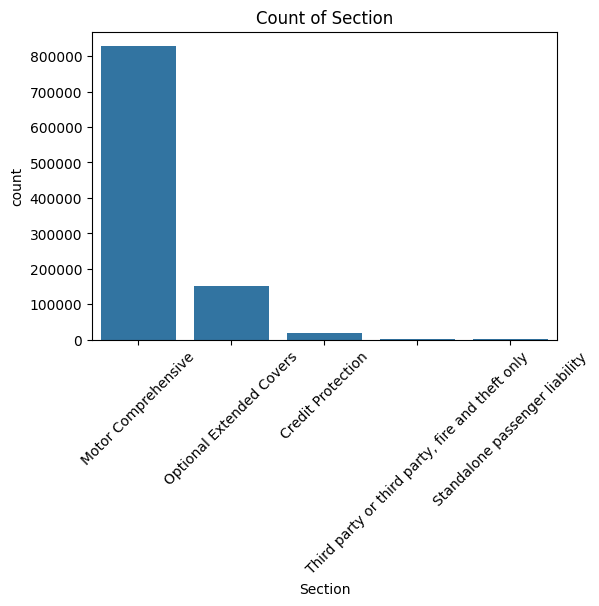

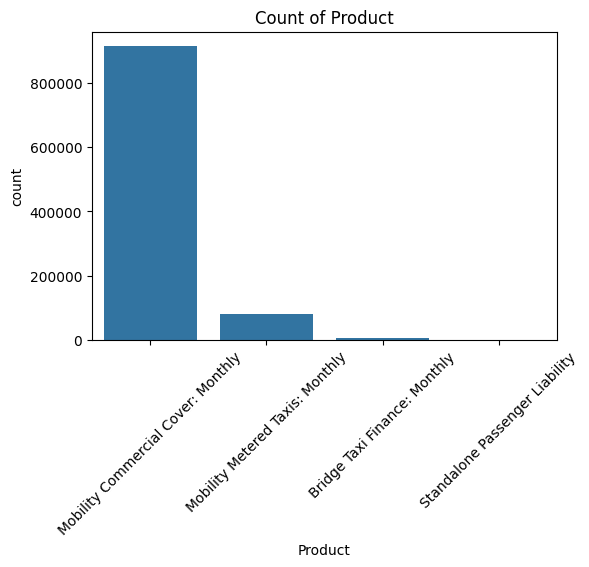

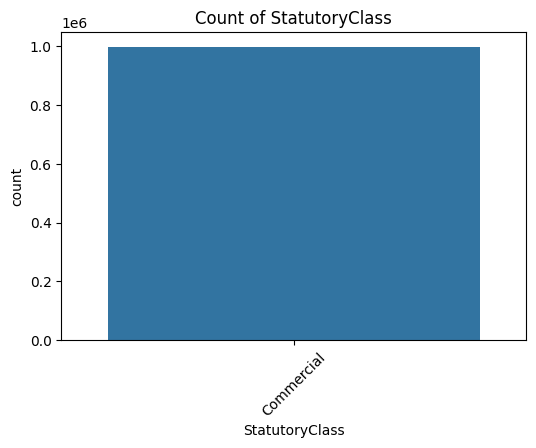

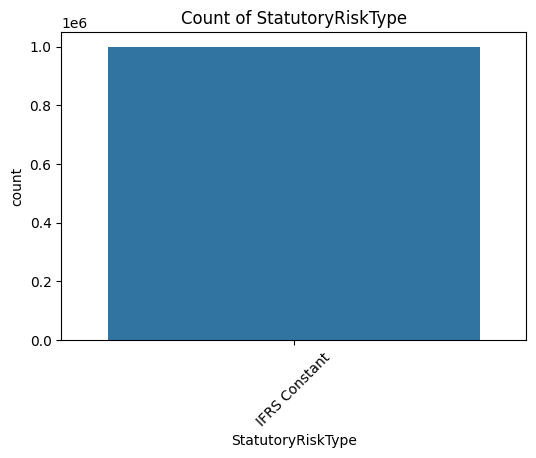

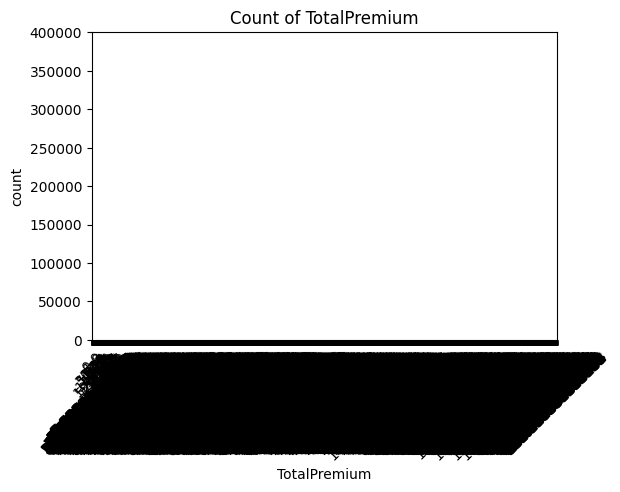

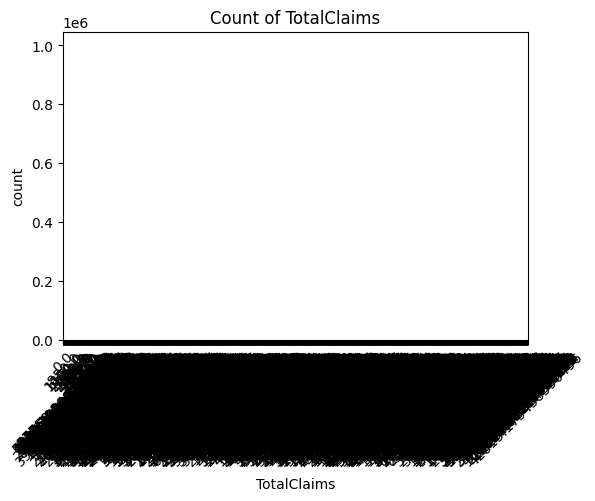

In [23]:
categorical_cols = convert_categoricals(df)
plot_correlation_analysis(df)
plot_geographic_trends(df)
plot_univariate_distributions(df , numerical_cols , categorical_cols )



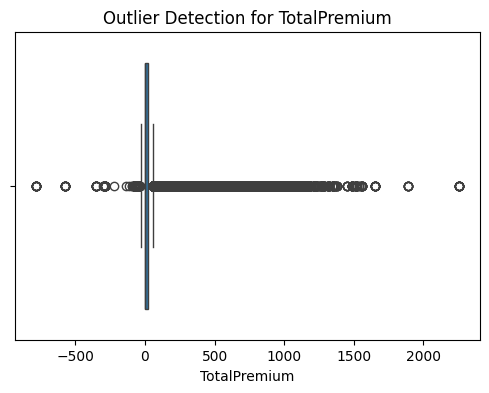

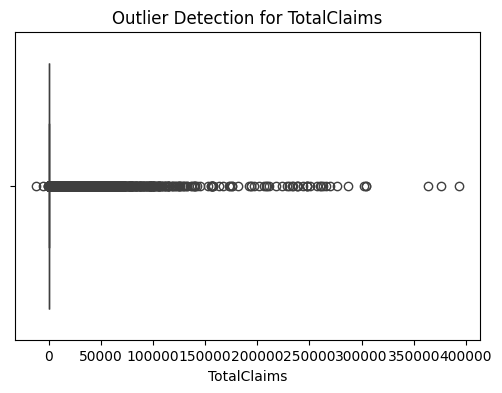

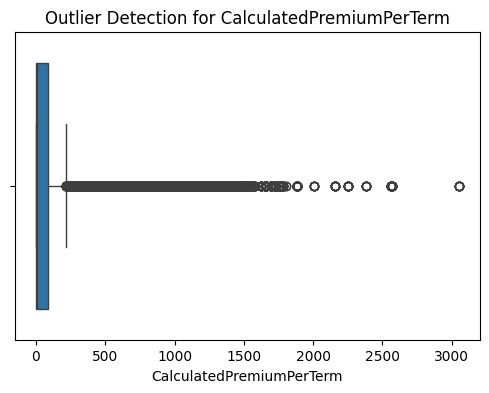

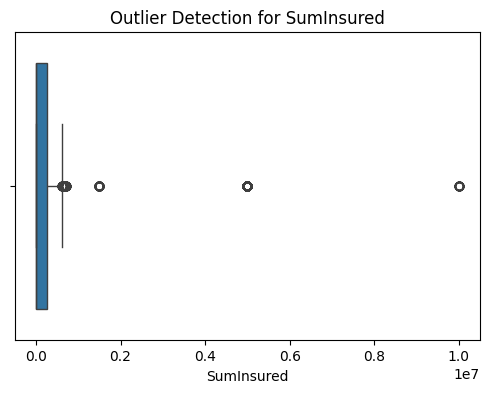

c:\Users\tsega\Desktop\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\notebooks\../scripts\project_planning.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("TransactionMonth").resample("M")[["TotalPremium", "TotalClaims"]].sum()


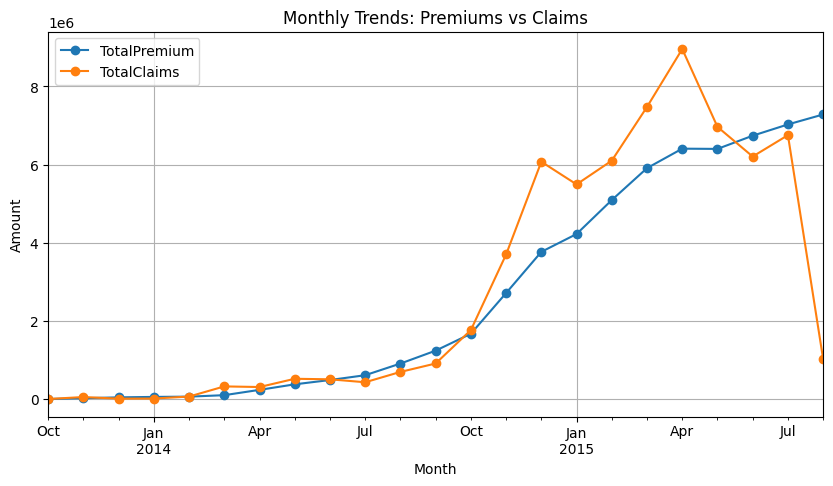

c:\Users\tsega\Desktop\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\notebooks\../scripts\project_planning.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_makes = df.groupby("make")["TotalClaims"].mean().sort_values(ascending=False).head(10)
c:\Users\tsega\Desktop\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\notebooks\../scripts\project_planning.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette="magma")


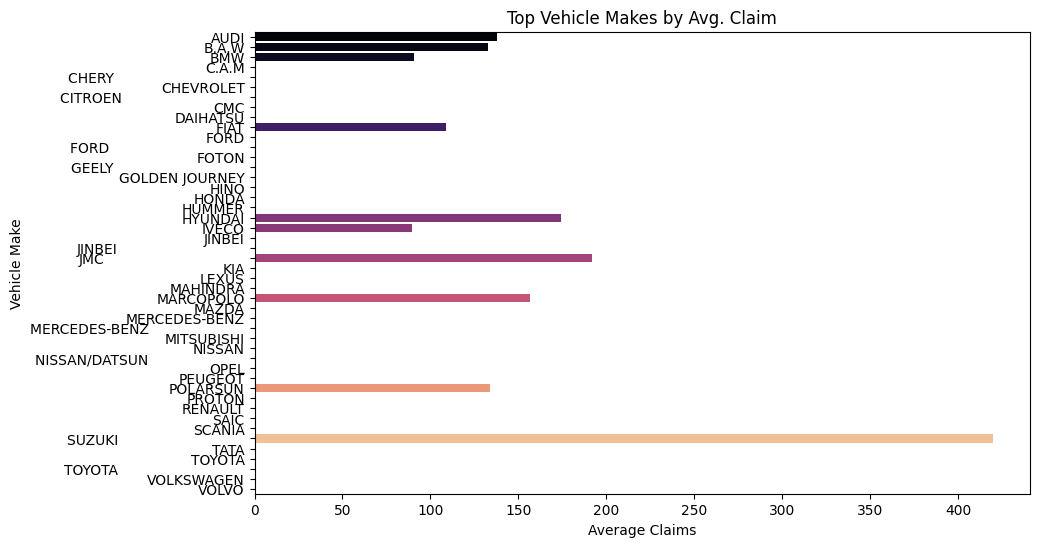

In [24]:
outlier_cols = [
    'TotalPremium',
    'TotalClaims',
    'CalculatedPremiumPerTerm',
    'SumInsured',

]

plot_outliers(df , outlier_cols)
plot_temporal_trends(df)
plot_make_vs_claims(df)


In [25]:
df.to_csv('../data/cleaned_insurance_analysis.csv')